In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
trip_start = dt.date(2018,6,21)
trip_end = dt.date(2018,6,30)

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)


In [11]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)


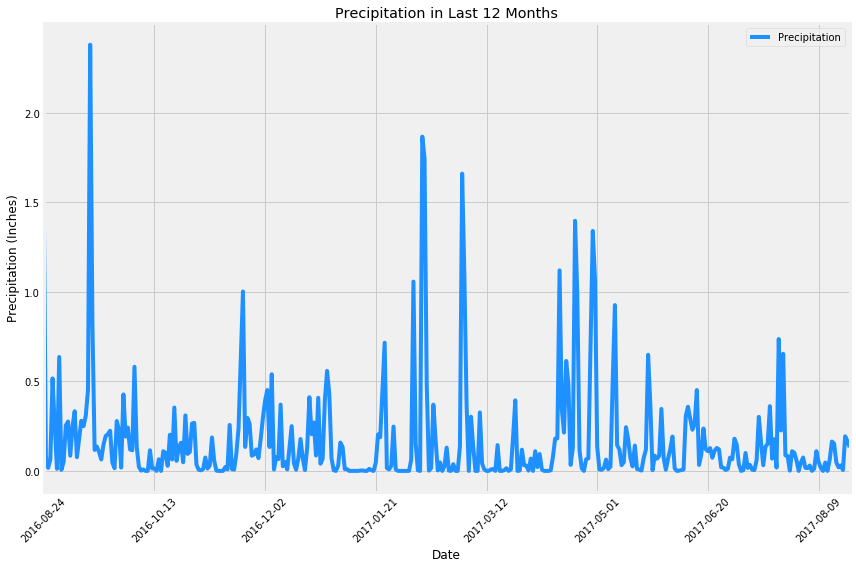

In [12]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results
Weather = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= last_twelve_months).\
group_by(Measurement.date).all()
#Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
precip = pd.DataFrame(Weather, columns=['Date','Precipitation'])

#Save the query results as a Pandas DataFrame and set the index to the date
#Sort the dataframe by date
precip.set_index('Date', inplace=True)

#Use Pandas Plotting with Matplotlib to plot the data
precip.plot(figsize=(12, 8), x_compat=True, color='dodgerblue')

plt.title("Precipitation in Last 12 Months")
plt.ylabel("Precipitation (Inches)")
plt.xlabel("Date")
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig("Precipitation.png")
plt.show()

In [13]:
Weather

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [15]:
# Design a query to show how many stations are available in this dataset?
Count = session.query(Station.name).count()
Count

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.tobs).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
top_station = stations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.station == top_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_df = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == top_station).\
    filter(Measurement.date >= last_twelve_months)
tobs_df = pd.DataFrame(tobs_df)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


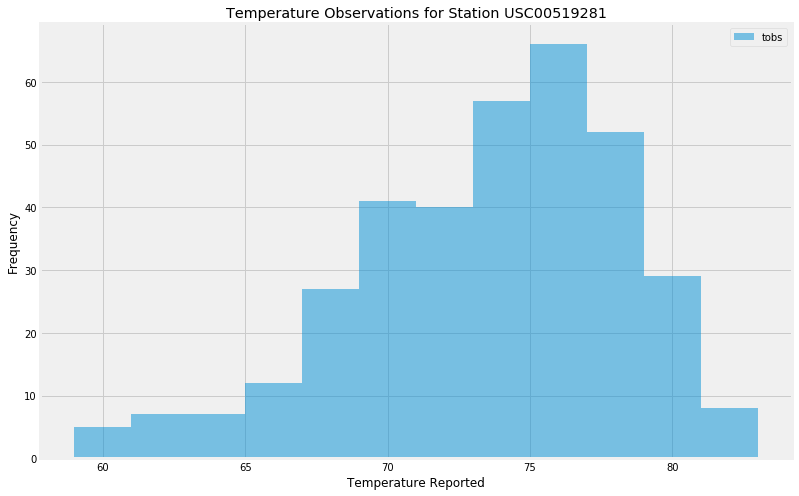

In [19]:
tobs_df.plot.hist(by='station', bins=12, figsize=(12,8), alpha=0.5)
plt.title("Temperature Observations for Station " + top_station)
plt.xlabel("Temperature Reported")
plt.savefig("StationTemps.png")
plt.show()

In [44]:
June_tobs = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "06").group_by(Measurement.date).limit(217).all()
December_tobs = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "12").group_by(Measurement.date).all()

print(stats.ttest_rel(June_tobs, December_tobs))
#Paired t-test because the temperatures are tallied in Hawaii
print("----"*20)
print("The paired t-test will be used in this instance because the weather is only gathered from Hawaii meaning that they have similar independent variables, the only dependence is the time of year.The t-test p-value is below 0.05 which means that we will reject our null hypothesis that the temperature in Hawaii is mild all year.")

Ttest_relResult(statistic=array([17.57826913]), pvalue=array([1.55642724e-43]))
--------------------------------------------------------------------------------
The paired t-test will be used in this instance because the weather is only gathered from Hawaii meaning that they have similar independent variables, the only dependence is the time of year.The t-test p-value is below 0.05 which means that we will reject our null hypothesis that the temperature in Hawaii is mild all year.


In [21]:
#This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
#and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):   
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

#function usage example
print(f"June: {calc_temps('2016-06-01', '2016-06-31')}")
print(f"December: {calc_temps('2016-12-01', '2016-12-31')}")

June: [(64.0, 75.17525773195877, 81.0)]
December: [(60.0, 71.13, 78.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_results = calc_temps('2017-06-21', '2017-06-30')
trip_results

[(71.0, 77.19354838709677, 82.0)]

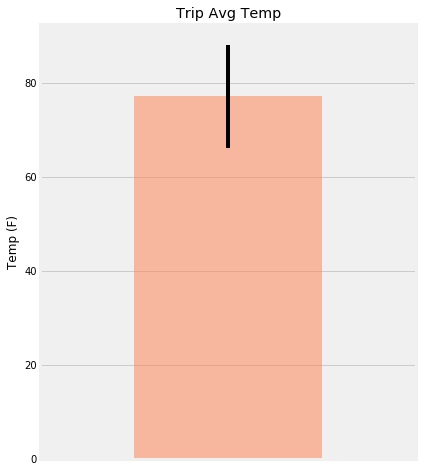

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot.bar(yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xticks([])
plt.savefig("TripTemp.png")
plt.show()

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= '2017-06-21').filter(Measurement.date <= '2017-06-30').\
        group_by(Measurement.station).\
        order_by(Measurement.prcp.desc()).all()


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.18),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.8300000000000001),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.3),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.14),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.12000000000000001),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.12),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.0)]

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end)
# Stip off the year and save a list of %m-%d strings
date_generated = trip_dates.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for trip_date in date_generated:
    normals.append(*daily_normals(trip_date))
normals_df = pd.DataFrame(normals, columns=['Tmin','Tavg','Tmax'])

In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')
normals_df

,Tmin,Tavg,Tmax
Date,,,
2018-06-21,68.0,74.758621,82.0
2018-06-22,69.0,75.157895,81.0
2018-06-23,68.0,74.543860,80.0
2018-06-24,68.0,74.964286,84.0
2018-06-25,68.0,74.103448,80.0
2018-06-26,67.0,74.214286,82.0
2018-06-27,66.0,75.017857,81.0
2018-06-28,69.0,74.886792,80.0
2018-06-29,67.0,74.915254,80.0


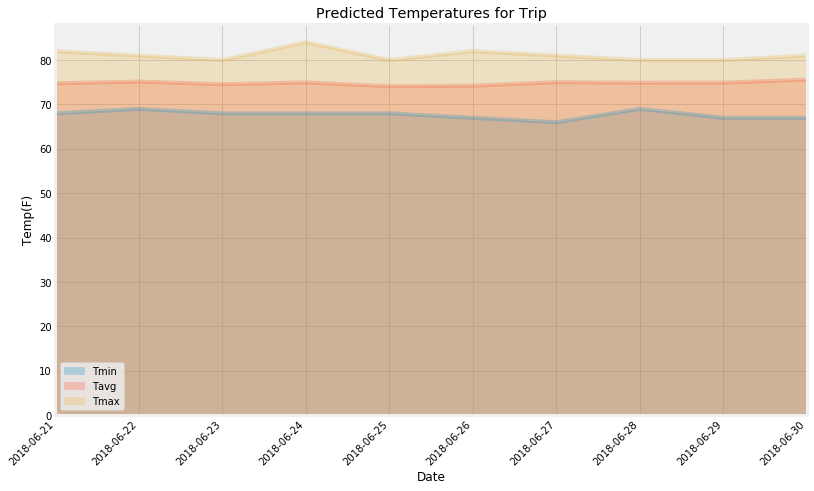

In [28]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(figsize=(12,8), stacked=False, x_compat=True, title = 'Predicted Temperatures for Trip', rot='45', alpha=0.25)
plt.xlabel('Date')
plt.ylabel('Temp(F)')
plt.savefig("Predicted Temps.png")
plt.show()